In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurements=Base.classes.measurement
stations=Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [12]:
#find latest date in dataset
last_day=session.query(func.max(func.strftime("%Y-%m-%d", measurements.date))).limit(1)
last_day[0]

('2017-08-23')

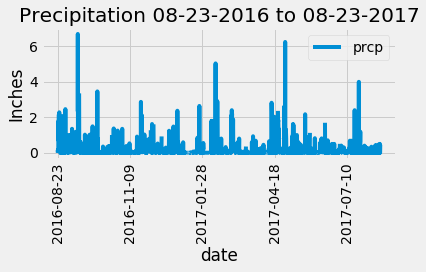

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#using last_day data, calculate year prior
prev_year=dt.date(2017, 8, 23) -dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precdata=session.query(measurements.date, measurements.prcp).filter(measurements.date>=prev_year).order_by(measurements.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df=pd.DataFrame(precdata)
rain_df.set_index('date', inplace=True)
rain_df=rain_df.sort_values('date')
#plot the data
rain_df.plot()
plt.title("Precipitation 08-23-2016 to 08-23-2017")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.tight_layout()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
total_stations=session.query(stations.station).count()
print(f'There are {total_stations} stations in the dataset.')

There are 9 stations in the dataset.


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stat=session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()
active_stat

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
#pull out most active station from prior list
most_active=active_stat[0][0]
print(f'The most active station is: {most_active}')

The most active station is: USC00519281


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
partstat=session.query(measurements.station, func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)).filter(measurements.station == most_active).all()
print(f'Station USC00519281 temperature statistics: ')
print(f'Average Temperature: {round(partstat[0][3],2)} Fahrenheit')
print(f'Lowest Temperature: {partstat[0][1]} Fahrenheit')
print(f'Highest Temperature: {partstat[0][2]} Fahrenheit')

Station USC00519281 temperature statistics: 
Average Temperature: 71.66 Fahrenheit
Lowest Temperature: 54.0 Fahrenheit
Highest Temperature: 85.0 Fahrenheit


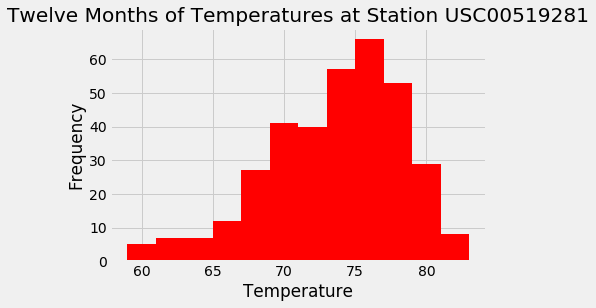

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_info=session.query(measurements.tobs).filter(measurements.date >= "2016-08-23").filter(measurements.station == most_active).all()
temp_df=pd.DataFrame(temp_info, columns=['Temp'])
plt.hist(temp_df['Temp'], bins=12,color="red")
plt.title("Twelve Months of Temperatures at Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()




## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
        filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
mytrip=calc_temps('2017-04-18', '2017-04-29')
mytrip

[(66.0, 74.02597402597402, 83.0)]

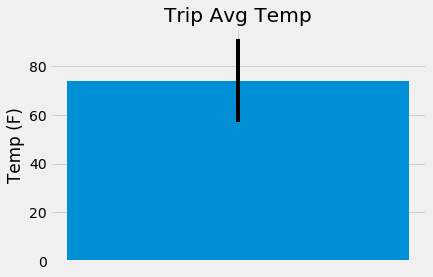

In [55]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
err=mytrip[0][2]-mytrip[0][0]
ht=mytrip[0][1]
plt.bar(1, ht, yerr=err)
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.xticks([1],[''])
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
